In [2]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn tensorflow keras
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

print("Libraries imported successfully!")


Libraries imported successfully!


**1.Data Handling**

In [42]:
import pandas as pd

# Load the dataset
file_path = '/content/AirQualityUCI.csv'  # Replace with your file path
data = pd.read_csv(file_path, delimiter=';')  # Adjust delimiter if needed


In [43]:
# Display dataset info
print(data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None

In [45]:
print(data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [46]:
#display column
print(data.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


**Data Cleaning**

Missing values

In [49]:
# Check missing values
print(data.isnull().sum())

# Fill missing values
data = data.ffill().bfill()  # Forward and backward fill
# Alternatively: data.interpolate(method='linear', inplace=True)

# Confirm no missing values
print(data.isnull().sum())


Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9471
Unnamed: 16      9471
Datetime            0
dtype: int64
Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9471
Unnamed: 16      9471
Datetime            0
dtype: int64


In [56]:
data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)


In [60]:
# Combine Date and Time columns
# Convert 'Date' and 'Time' columns to string type to handle potential mixed types
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Replace 'nan' values with empty strings before applying to_datetime
data['timestamp'] = pd.to_datetime(data['Date'].str.replace('nan', '') + ' ' + data['Time'].str.replace('nan', ''), format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Set the timestamp as the index
data.set_index('timestamp', inplace=True)

# Drop original Date and Time columns
data.drop(columns=['Date', 'Time'], inplace=True)

# Check the updated dataset
print(data.head())

                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
timestamp                                                                     
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
timestamp                                                           
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0    

EDA

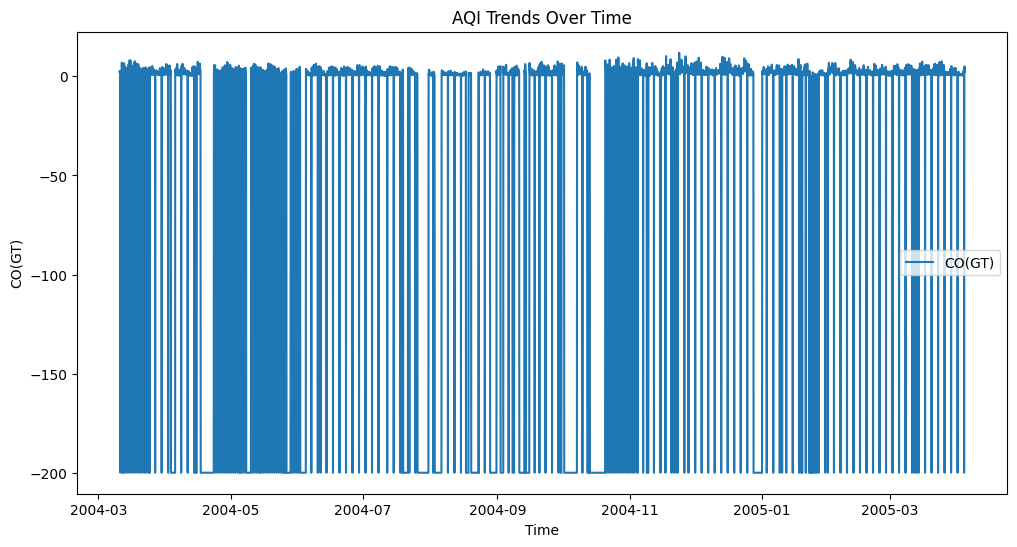

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for AQI trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CO(GT)'], label='CO(GT)')
plt.title('AQI Trends Over Time')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()




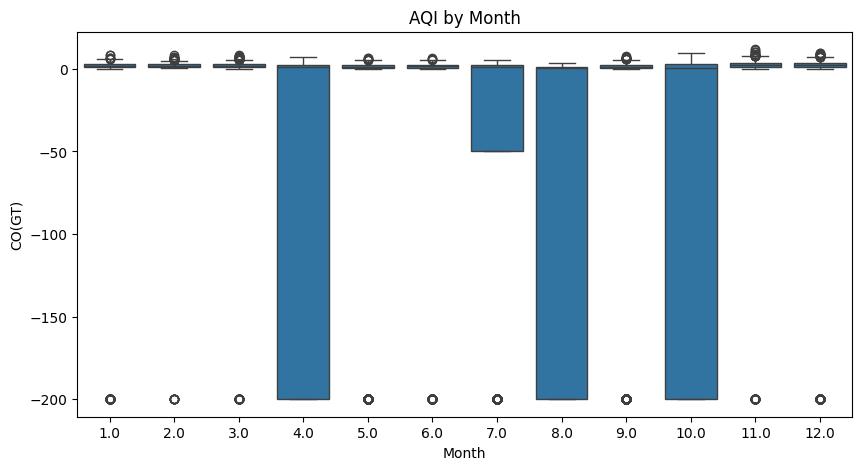

In [63]:
# Seasonal analysis using a boxplot
data['Month'] = data.index.month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='CO(GT)', data=data)
plt.title('AQI by Month')
plt.xlabel('Month')
plt.ylabel('CO(GT)')
plt.show()

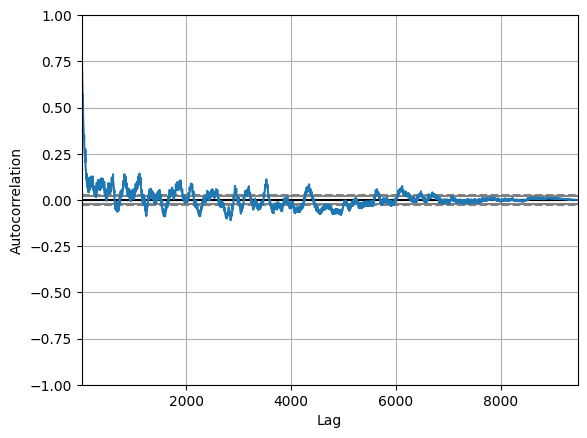

In [64]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['CO(GT)'].dropna())
plt.show()


**2.Feature Engineering**

In [65]:
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday



In [68]:
# Convert 'CO(GT)' column to numeric, handling commas as decimal separators
# Convert the column to string type first to allow str.replace
data['CO(GT)'] = data['CO(GT)'].astype(str).str.replace(',', '.', regex=False)
data['CO(GT)'] = pd.to_numeric(data['CO(GT)'], errors='coerce')

# Calculate rolling mean for CO(GT)
data['CO_MA_3'] = data['CO(GT)'].rolling(window=24).mean()

In [13]:
print(data.head())

                    CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
timestamp                                                                   
2004-03-10 18:00:00    2,6       1360.0     150.0     11,9         1046.0   
2004-03-10 19:00:00      2       1292.0     112.0      9,4          955.0   
2004-03-10 20:00:00    2,2       1402.0      88.0      9,0          939.0   
2004-03-10 21:00:00    2,2       1376.0      80.0      9,2          948.0   
2004-03-10 22:00:00    1,6       1272.0      51.0      6,5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
timestamp                                                           
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0        1205.0    

Moving Averages and Rolling Statistics

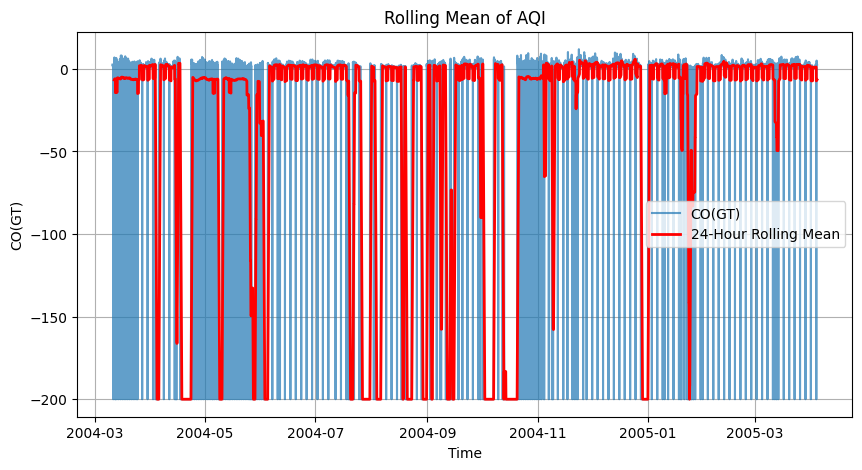

In [69]:
# 24-hour rolling average
# Ensure 'AQI' column is numeric
data['CO(GT)'] = pd.to_numeric(data['CO(GT)'], errors='coerce')

# Compute the 24-hour rolling average
data['AQI_Rolling_Mean'] = data['CO(GT)'].rolling(window=24).mean()

# Plotting the original AQI and rolling mean
plt.figure(figsize=(10, 5))
plt.plot(data['CO(GT)'], label='CO(GT)', alpha=0.7)  # Original AQI
plt.plot(data['AQI_Rolling_Mean'], label='24-Hour Rolling Mean', color='red', linewidth=2)  # Rolling mean
plt.title('Rolling Mean of AQI')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()



Lag Features

In [70]:
data['CO_Lag_1'] = data['CO(GT)'].shift(1)
data['CO_Lag_2'] = data['CO(GT)'].shift(2)


**3. Model Training**


LSTM Model

In [71]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['CO(GT)']].dropna())

# Prepare input features and targets
sequence_length = 10
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Split data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Train LSTM Model

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0948 - val_loss: 0.0278
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0371 - val_loss: 0.0256
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0315 - val_loss: 0.0241
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0302 - val_loss: 0.0222
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0281 - val_loss: 0.0219
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0260 - val_loss: 0.0216
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0281 - val_loss: 0.0221
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0263 - val_loss: 0.0217
Epoch 9/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0262 - val_loss: 0.0228
Epoch 10/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0254 - val_loss: 0.0227
Epoch 11/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0279 - val_loss: 0.0214
Epoch 12/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 

Train ARIMA for Comparison

In [94]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(data['CO(GT)'], order=(2, 6, 2))
model_fit = model.fit()

# Forecast and evaluate
forecast = model_fit.forecast(steps=10)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

9471    2.200149
9472    2.200552
9473    2.201424
9474    2.203018
9475    2.205619
9476    2.209599
9477    2.215352
9478    2.223341
9479    2.234082
9480    2.248136
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**4.Visualization**

Actual vs. predicted LSTM

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


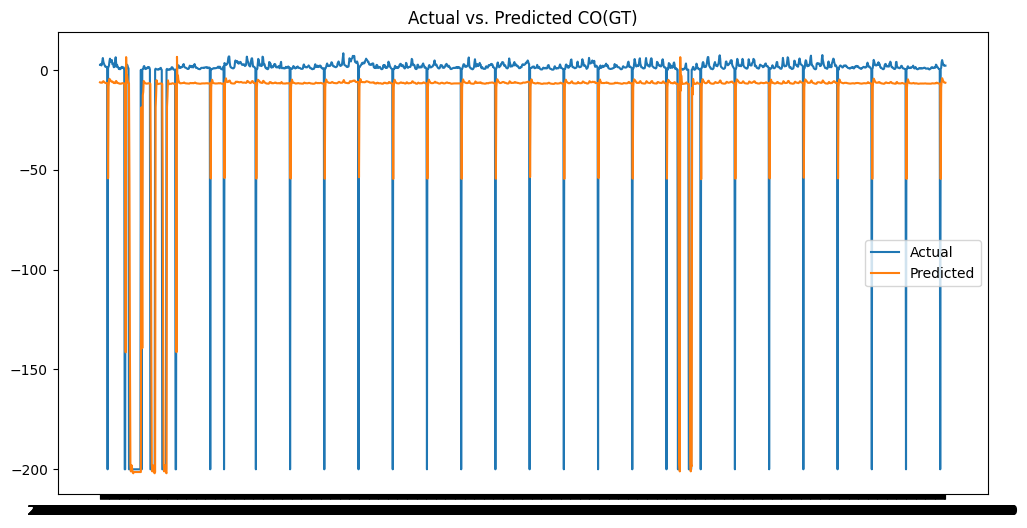

In [76]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'][-len(predicted):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(data['Datetime'][-len(predicted):], predicted, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted CO(GT)')
plt.show()


Model Evaluation

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, predicted))
mae = mean_absolute_error(y_test, predicted)
print(f"RMSE: {rmse}, MAE: {mae}")


RMSE: 33.53700619103094, MAE: 13.265969990555128


Error Distribution

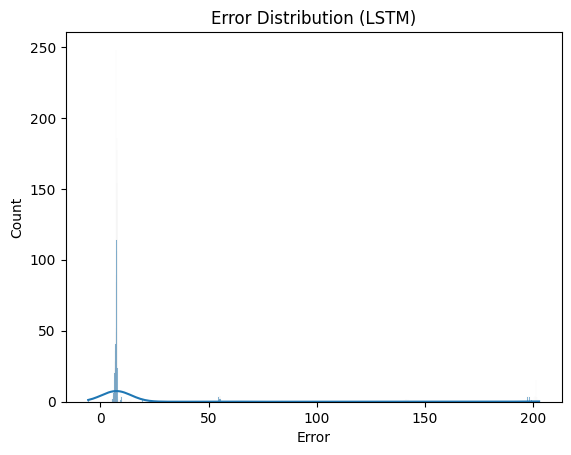

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the errors
errors = y_test.reshape(-1) - predicted.reshape(-1)

# Visualize error distribution
sns.histplot(errors, kde=True)
plt.title('Error Distribution (LSTM)')
plt.xlabel('Error')
plt.show()

Original vs. Predicted time series

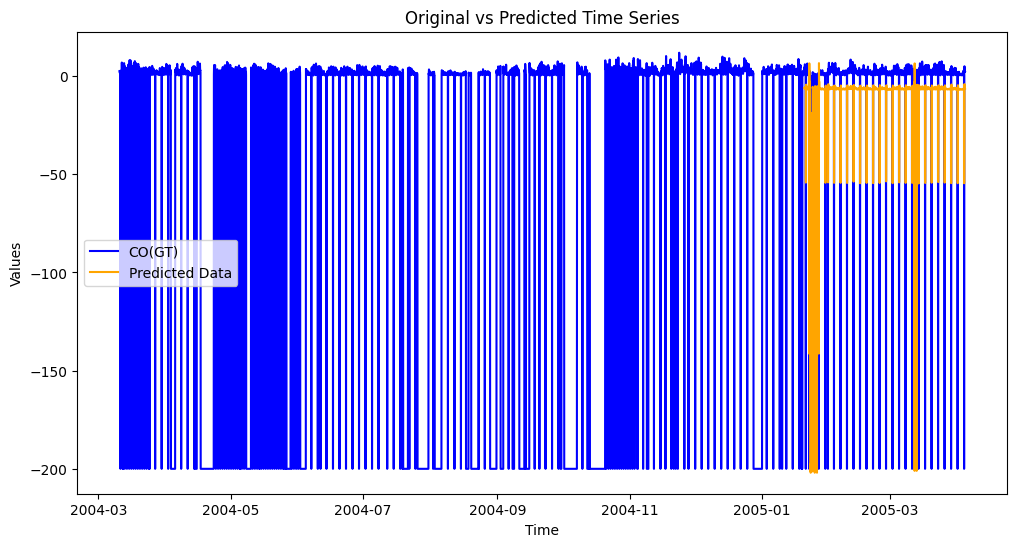

In [98]:
import matplotlib.pyplot as plt

# Plot original data and predictions
plt.figure(figsize=(12, 6))
# Use 'data' instead of 'df' to access the DataFrame
plt.plot(data.index, data['CO(GT)'], label='CO(GT)', color='blue')
plt.plot(data.index[-len(y_test):], predicted, label='Predicted Data', color='orange')  # Assuming 'predicted' holds your LSTM predictions
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Residual Error distribution

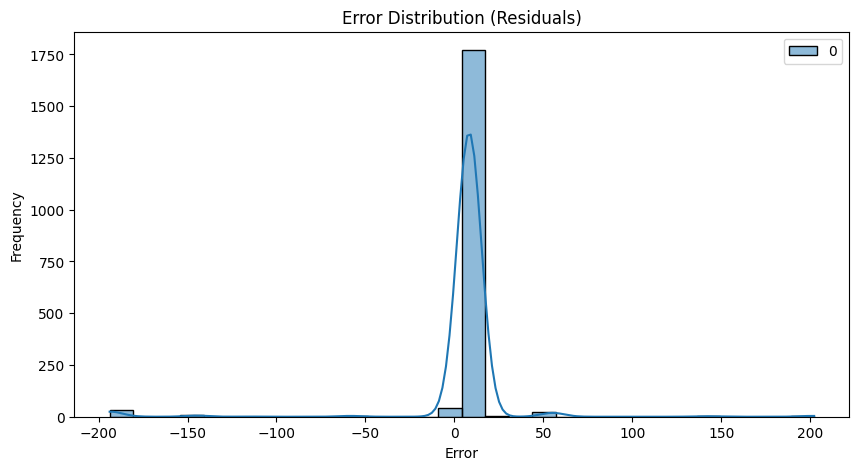

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Importing MinMaxScaler

# Assuming 'scaler' is the MinMaxScaler object used for normalization
# and 'predicted' holds the LSTM predictions

# Inverse transform to get original scale values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = predicted # 'predicted' is already in the original scale, as it was inverse transformed in cell 80

# Calculate residuals
errors = y_test_inv - y_pred_inv

# Plot error distribution
plt.figure(figsize=(10, 5))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.title('Error Distribution (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

Forecast Visualization

<ipython-input-104-dcd4daa89767>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_valid_index, periods=10, freq='H')


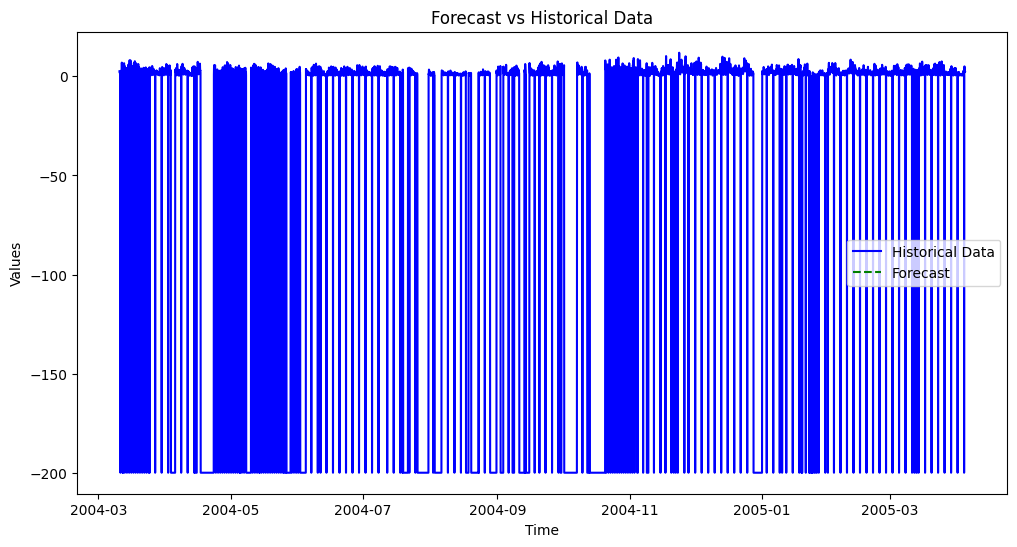

In [104]:
# Example of forecast visualization
import matplotlib.pyplot as plt
import pandas as pd

# Check for NaT in index
if pd.isnull(data.index[-1]):
    # Handle NaT, e.g., use the last valid index
    last_valid_index = data.index[data.index.notna()][-1]
    forecast_index = pd.date_range(start=last_valid_index, periods=10, freq='H')
else:
    forecast_index = pd.date_range(start=data.index[-1], periods=10, freq='H')

forecast_series = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CO(GT)'], label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_series, label='Forecast', color='green', linestyle='--')
plt.title('Forecast vs Historical Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

 Model Accuracy: Actual vs Predicted Scatter Plot

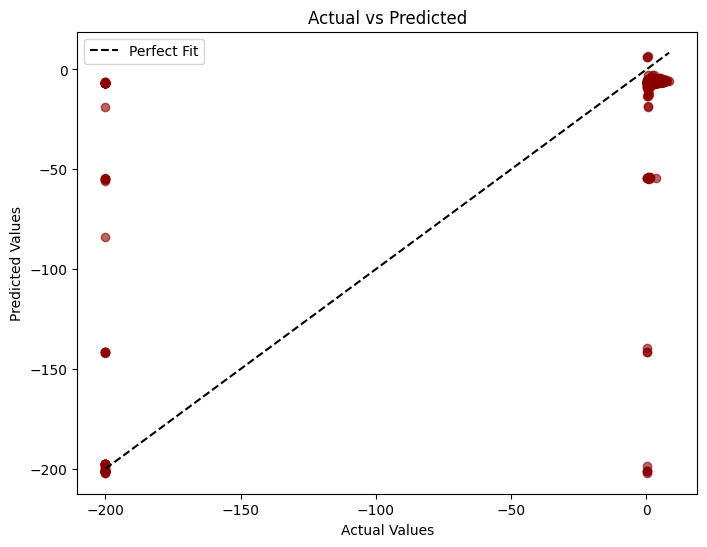

In [113]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, y_pred_inv, color='darkred', alpha=0.6)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='black', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()


Rolling Mean to Highlight Trends

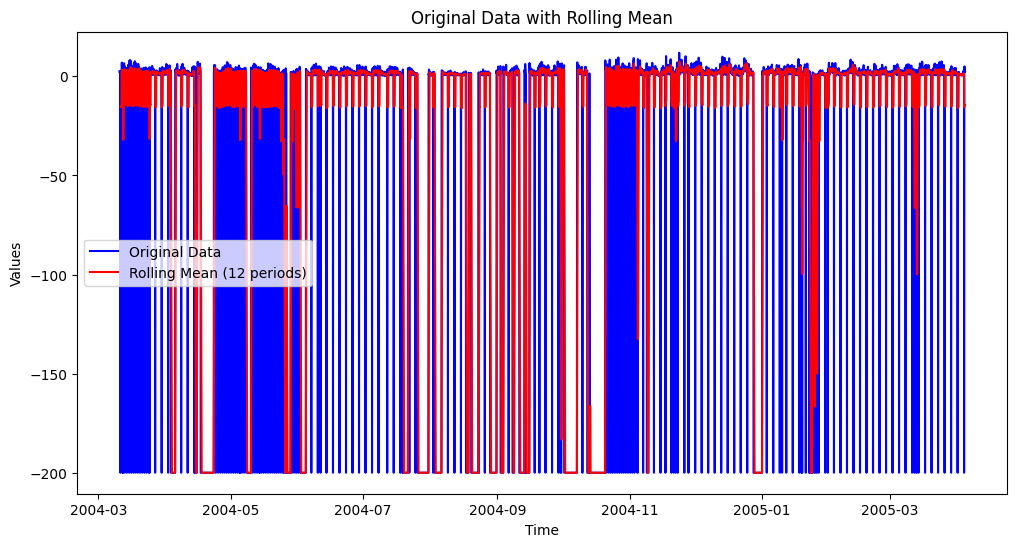

In [115]:
# Calculate rolling mean
# Assuming 'data' is your DataFrame and 'CO(GT)' is your target column
rolling_mean = data['CO(GT)'].rolling(window=12).mean()

# Plot original data vs rolling mean
plt.figure(figsize=(12, 6))
# Use 'data' instead of 'df' to access the DataFrame and index
plt.plot(data.index, data['CO(GT)'], label='Original Data', color='blue')
plt.plot(data.index, rolling_mean, label='Rolling Mean (12 periods)', color='red')
plt.title('Original Data with Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()